In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [42]:
#read data from file
diab_data = pd.read_csv('diabetic_data.csv')

print ("data shape is: ",diab_data.shape)

data shape is:  (101766, 50)


In [43]:
# make a copy of the dataframe for preprocessing
df_diab = diab_data.copy(deep=True)

In [44]:
# calculate missing values
missing_values = pd.DataFrame(df_diab.isnull().sum(axis=0), columns = ['number_of_missing_values'])
missing_values['feature'] = missing_values.index
missing_values = missing_values[['feature','number_of_missing_values']].reset_index (drop = True)
missing_values[missing_values.number_of_missing_values > 0]

,feature,number_of_missing_values


In [45]:
# calculate missing values
for col in df_diab.columns:
    if df_diab[col].dtype == object:
         print(col,df_diab[col][df_diab[col] == '?'].count())
print('gender', df_diab['gender'][df_diab['gender'] == 'Unknown/Invalid'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 3


In [46]:
# calculate the readmission numbers
# df_diab['readmitted'] = df_diab['readmitted'].apply(lambda x: f)
df_diab['readmitted'] = df_diab['readmitted'].replace('>30', 2)
df_diab['readmitted'] = df_diab['readmitted'].replace('<30', 1) #should we code it into 1 and 2?
df_diab['readmitted'] = df_diab['readmitted'].replace('NO', 0)

#noreadmitted = df_diab['readmitted'][df_diab['readmitted'] == 0].count()
print('>30 readmissions', df_diab['readmitted'][df_diab['readmitted'] == 2].count())
print('<30 readmissions', df_diab['readmitted'][df_diab['readmitted'] == 1].count())
print('no readmissions', df_diab['readmitted'][df_diab['readmitted'] == 0].count())

>30 readmissions 35545
<30 readmissions 11357
no readmissions 54864


In [47]:
drop_Index = set(df_diab[(df_diab['diag_1'] == '?') & (df_diab['diag_2'] == '?') & (df_diab['diag_3'] == '?')].index)

In [48]:
drop_Index

{87181}

In [49]:
drop_Index = drop_Index.union(set(df_diab[df_diab['discharge_disposition_id'] == 11].index))
drop_Index = drop_Index.union(set(df_diab['gender'][df_diab['gender'] == 'Unknown/Invalid'].index))

In [50]:
# dropping discharge_disposition_id = 11, which means the patient died
# dropping the missing values in gender
# drop_Index = set(df_diab['race'][df_diab['race'] == '?'].index)
new_Index = list(set(df_diab.index) - set(drop_Index))
df_diab = df_diab.iloc[new_Index]

In [51]:
# dropping columns with too many missing values
df_diab = df_diab.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [52]:
# remove columns having same value in each row: citoglipton, examide
df_diab = df_diab.drop(['citoglipton', 'examide'], axis = 1)

In [53]:
df_diab = df_diab.drop(['encounter_id'], axis = 1)

In [54]:
# code the non-numeric values
df_diab['change'] = df_diab['change'].replace('Ch', 1)
df_diab['change'] = df_diab['change'].replace('No', 0)

df_diab['gender'] = df_diab['gender'].replace('Male', 1)
df_diab['gender'] = df_diab['gender'].replace('Female', 0)

df_diab['diabetesMed'] = df_diab['diabetesMed'].replace('Yes', 1)
df_diab['diabetesMed'] = df_diab['diabetesMed'].replace('No', 0)

# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df_diab['age'] = df_diab['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)

# Features have been coded

In [55]:
# re-encoding admission type, discharge type and admission source into fewer categories

df_diab['admission_type_id'] = df_diab['admission_type_id'].replace(2,1)
df_diab['admission_type_id'] = df_diab['admission_type_id'].replace(7,1)
df_diab['admission_type_id'] = df_diab['admission_type_id'].replace(6,5)
df_diab['admission_type_id'] = df_diab['admission_type_id'].replace(8,5)

df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(6,1)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(8,1)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(9,1)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(13,1)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(3,2)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(4,2)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(5,2)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(14,2)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(22,2)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(23,2)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(24,2)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(12,10)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(15,10)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(16,10)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(17,10)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(25,18)
df_diab['discharge_disposition_id'] = df_diab['discharge_disposition_id'].replace(26,18)

df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(2,1)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(3,1)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(5,4)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(6,4)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(10,4)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(22,4)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(25,4)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(15,9)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(17,9)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(20,9)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(21,9)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(13,11)
df_diab['admission_source_id'] = df_diab['admission_source_id'].replace(14,11)

In [56]:
# Creating additional columns for diagnosis
df_diab['1_diag1'] = df_diab['diag_1']

In [57]:
df_diab.loc[df_diab['diag_1'].str.contains('V'), ['1_diag1']] = 0
df_diab.loc[df_diab['diag_1'].str.contains('E'), ['1_diag1']] = 0
df_diab['1_diag1'] = df_diab['1_diag1'].replace('?', -1)
df_diab['1_diag1'] = df_diab['1_diag1'].astype(float)

In [58]:
for index, row in df_diab.iterrows():
    if (row['1_diag1'] >= 390 and row['1_diag1'] < 460) or (np.floor(row['1_diag1']) == 785):
        df_diab.loc[index, '1_diag1'] = 1
    elif (row['1_diag1'] >= 460 and row['1_diag1'] < 520) or (np.floor(row['1_diag1']) == 786):
        df_diab.loc[index, '1_diag1'] = 2
    elif (row['1_diag1'] >= 520 and row['1_diag1'] < 580) or (np.floor(row['1_diag1']) == 787):
        df_diab.loc[index, '1_diag1'] = 3
    elif (np.floor(row['1_diag1']) == 250):
        df_diab.loc[index, '1_diag1'] = 4
    elif (row['1_diag1'] >= 800 and row['1_diag1'] < 1000):
        df_diab.loc[index, '1_diag1'] = 5
    elif (row['1_diag1'] >= 710 and row['1_diag1'] < 740):
        df_diab.loc[index, '1_diag1'] = 6
    elif (row['1_diag1'] >= 580 and row['1_diag1'] < 630) or (np.floor(row['1_diag1']) == 788):
        df_diab.loc[index, '1_diag1'] = 7
    elif (row['1_diag1'] >= 140 and row['1_diag1'] < 240):
        df_diab.loc[index, '1_diag1'] = 8
    else:
        df_diab.loc[index, '1_diag1'] = 0

In [59]:
# convert age back to integer type
df_diab['age'] = df_diab['age'].astype('int64')
print(df_diab.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df_diab['age'] = df_diab.age.map(age_dict)
print(df_diab.age.value_counts())

8     25564
7     22186
6     17102
9     16708
5      9626
4      3765
10     2669
3      1650
2       690
1       160
Name: age, dtype: int64
75    25564
65    22186
55    17102
85    16708
45     9626
35     3765
95     2669
25     1650
15      690
5       160
Name: age, dtype: int64


In [60]:
# convert data type of nominal features in dataframe to 'object' type
i = ['patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', '1_diag1']

df_diab[i] = df_diab[i].astype('object')

In [61]:
# get list of only numeric features
numeric_col = list(set(list(df_diab._get_numeric_data().columns))- {'readmitted'})

In [62]:
numeric_col

['time_in_hospital',
 'number_inpatient',
 'number_diagnoses',
 'number_outpatient',
 'num_procedures',
 'num_medications',
 'number_emergency',
 'num_lab_procedures']

In [63]:
df_diab = df_diab.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

In [64]:
# get list of only numeric features
numerics = list(set(list(df_diab._get_numeric_data().columns))- {'readmitted'})

In [65]:
numerics

['time_in_hospital',
 'number_diagnoses',
 'num_procedures',
 'num_medications',
 'num_lab_procedures']

In [66]:
df_diab['readmitted'] = df_diab['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [67]:
# drop individual diagnosis columns that have too granular disease information
df_diab.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

In [68]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
]

In [69]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df_diab[name] = df_diab[inter[0]] * df_diab[inter[1]]

In [70]:
df_diab[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,1,1,1
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8


In [71]:
datfm = pd.DataFrame()
datfm['features'] = numerics
datfm['std_dev'] = datfm['features'].apply(lambda x: df_diab[x].std())
datfm['mean'] = datfm['features'].apply(lambda x: df_diab[x].mean())

In [72]:
# Logical order: duplicate removal, then outlier removal followed by scaling
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df_diab.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(70442, 47)

In [74]:
df2[numerics]

,time_in_hospital,number_diagnoses,num_procedures,num_medications,num_lab_procedures
0,1,1,0,1,41
1,3,9,0,18,59
2,2,6,5,13,11
3,2,7,1,16,44
4,1,5,0,8,51
5,3,9,6,16,31
6,4,7,1,21,70
7,5,8,0,12,73
8,13,8,2,28,68
9,12,8,3,18,33


In [75]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [78]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

C:\Users\pankaagarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [79]:
df2

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,readmitted,1_diag1,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital
1,55629189,Caucasian,0,15,1,1,7,-0.436559,0.808109,-0.810421,...,0,0,54,0,177,1062,162,135,18,27
2,86047875,AfricanAmerican,0,25,1,1,7,-0.776736,-1.603864,2.038691,...,0,0,26,65,22,143,78,150,0,12
3,82442376,Caucasian,1,35,1,1,7,-0.776736,0.054368,-0.240598,...,0,0,32,16,88,704,112,245,16,14
4,42519267,Caucasian,1,45,1,1,7,-1.116914,0.406114,-0.810421,...,0,8,8,0,51,408,40,225,8,5
5,82637451,Caucasian,1,55,1,1,1,-0.436559,-0.598875,2.608514,...,0,1,48,96,93,496,144,495,0,27
6,84259809,Caucasian,1,65,3,1,1,-0.096381,1.360853,-0.240598,...,0,1,84,21,280,1470,147,455,21,28
7,114882984,Caucasian,1,75,1,1,7,0.243797,1.511602,-0.810421,...,0,1,60,0,365,876,96,600,0,40
8,48330783,Caucasian,0,85,1,1,4,2.965218,1.260354,0.329224,...,0,1,364,56,884,1904,224,680,28,104
9,63555939,Caucasian,0,95,3,2,4,2.625041,-0.498376,0.899046,...,0,1,216,54,396,594,144,760,18,96
10,89869032,AfricanAmerican,0,45,1,1,7,1.604508,0.205116,0.329224,...,0,4,153,34,423,799,153,405,0,81


In [38]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

C:\Users\pankaagarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\pankaagarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
df2

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,readmitted,1_diag1,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital


In [80]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# my_cmap = ListedColormap(sns.color_palette("RdYlGn", n_colors=15).as_hex())
# my_cmap = ListedColormap(sns.diverging_palette(150, 250, sep=120, n=28, center="light").as_hex())

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
# drop some columns due to their means is round to 0
# table = df.drop(['acetohexamide','tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','patient_nbr', 'encounter_id', 'service_utilization_log1p'], axis = 1).corr(method='pearson')
table = df2.drop(['patient_nbr'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,number_diagnoses|time_in_hospital
time_in_hospital,1,0.319294,0.144815,0.444484,0.228696,0.0556191,0.860931,0.269383,0.854538,0.502543,0.458,0.936838
num_lab_procedures,0.319294,1,0.0117333,0.233144,0.149882,0.0312516,0.328261,0.111424,0.672919,0.733784,0.264196,0.324783
num_procedures,0.144815,0.0117333,1,0.333976,0.0693433,-0.000607595,0.263085,0.879343,0.136967,0.241563,0.291642,0.155254
num_medications,0.444484,0.233144,0.333976,1,0.265519,0.0394423,0.7533,0.59466,0.443372,0.773303,0.897082,0.467957
number_diagnoses,0.228696,0.149882,0.0693433,0.265519,1,0.0435743,0.253476,0.119865,0.227524,0.267217,0.614434,0.491859
readmitted,0.0556191,0.0312516,-0.000607595,0.0394423,0.0435743,1,0.0529437,0.0109636,0.050184,0.0440983,0.0491134,0.059723
num_medications|time_in_hospital,0.860931,0.328261,0.263085,0.7533,0.253476,0.0529437,1,0.494198,0.798079,0.725841,0.724175,0.841115
num_medications|num_procedures,0.269383,0.111424,0.879343,0.59466,0.119865,0.0109636,0.494198,1,0.278469,0.47768,0.528227,0.280217
time_in_hospital|num_lab_procedures,0.854538,0.672919,0.136967,0.443372,0.227524,0.050184,0.798079,0.278469,1,0.736191,0.465781,0.820967
num_medications|num_lab_procedures,0.502543,0.733784,0.241563,0.773303,0.267217,0.0440983,0.725841,0.47768,0.736191,1,0.741684,0.525747


In [81]:
pd.options.display.max_rows = 400

c = df2.corr().abs()
s = c.unstack()
print(s.shape)
so = s.sort_values(ascending=False)

so[38:120]

(144,)


num_medications|time_in_hospital     num_medications|num_lab_procedures     0.725841
num_medications|num_lab_procedures   num_medications|time_in_hospital       0.725841
num_medications|time_in_hospital     num_medications|number_diagnoses       0.724175
num_medications|number_diagnoses     num_medications|time_in_hospital       0.724175
num_lab_procedures                   time_in_hospital|num_lab_procedures    0.672919
time_in_hospital|num_lab_procedures  num_lab_procedures                     0.672919
number_diagnoses                     num_medications|number_diagnoses       0.614434
num_medications|number_diagnoses     number_diagnoses                       0.614434
number_diagnoses|time_in_hospital    num_medications|number_diagnoses       0.598086
num_medications|number_diagnoses     number_diagnoses|time_in_hospital      0.598086
num_medications|num_procedures       num_medications                        0.594660
num_medications                      num_medications|num_procedur

In [82]:
df2['1_diag1'] = df2['1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', '1_diag1'], drop_first = True)

C:\Users\pankaagarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', '1_diag1' ]

In [84]:
num_cols = list(set(list(df_diab._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['number_diagnoses|time_in_hospital',
 'time_in_hospital',
 'num_medications|time_in_hospital',
 'number_diagnoses',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_procedures',
 'num_medications',
 'num_medications|num_procedures',
 'num_lab_procedures',
 'num_medications|number_diagnoses']

In [85]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

# new_non_num_cols

In [86]:
new_non_num_cols

['race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 '1_diag1_1.0',
 '1_diag1_2.0',
 '1_diag1_3.0',
 '1_diag1_4.0',
 '1_diag1_5.0',
 '1_diag1_6.0',
 '1_diag1_7.0',
 '1_diag1_8.0']

In [87]:
b
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital']

In [90]:
feature_set = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                 'number_diagnoses', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
                 'race_Other', 'gender_1','admission_type_id_3', 'admission_type_id_4',
                 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_8', 'admission_source_id_9', 'admission_source_id_11',
                 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital','1_diag1_1.0', '1_diag1_2.0', '1_diag1_3.0', '1_diag1_4.0',
                 '1_diag1_5.0', '1_diag1_6.0', '1_diag1_7.0', '1_diag1_8.0']

In [91]:
train_input = df_pd[feature_set]
train_output = df_pd['readmitted']

In [92]:
from imblearn.over_sampling import SMOTE

from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 62436, 1: 6119})
New dataset shape Counter({0: 62436, 1: 62436})


In [93]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score: 60.36%
Dev Set score: 60.66%


In [95]:
import statsmodels.api as sm
logit2 = sm.Logit(Y_train, X_train)

result2 = logit2.fit()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(result2.summary())
logit2_coefs = pd.DataFrame(result2.params)
logit2_coefs.reset_index(level=0, inplace=True)
logit2_coefs.columns = ["Feature", "Coefficient"]
logit2_pvals = pd.DataFrame(result2.pvalues)
logit2_pvals.reset_index(level=0, inplace=True)
logit2_pvals.columns = ["Feature", "pVal"]

logit2_coefs = logit2_coefs.merge(logit2_pvals, how="inner", on=["Feature"])
logit2_coefs = logit2_coefs[logit2_coefs.pVal <0.01]
logit2_coefs

         Current function value: 0.669830
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                99897
Model:                          Logit   Df Residuals:                    99858
Method:                           MLE   Df Model:                           38
Date:                Fri, 31 Aug 2018   Pseudo R-squ.:                 0.03364
Time:                        19:53:01   Log-Likelihood:                -66914.
converged:                      False   LL-Null:                       -69243.
                                        LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
age                                     0.0157      0.002     10.012      0.000       0.013   

C:\Users\pankaagarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,Feature,Coefficient,pVal
0,age,0.015659,1.348356e-23
1,time_in_hospital,0.357441,2.632744e-30
3,num_procedures,-0.074537,8.094055e-05
4,number_diagnoses,0.420794,8.571278e-47
5,race_AfricanAmerican,0.109778,6.175773e-03
10,gender_1,0.045871,1.212497e-03
11,admission_type_id_3,-0.079786,8.093682e-04
14,discharge_disposition_id_2,0.830827,0.000000e+00
15,discharge_disposition_id_7,0.366786,5.123925e-05
16,discharge_disposition_id_10,2.302081,3.642711e-21


In [96]:
Y_dev_predict = result2.predict(X_dev, linear=False)
Y_dev_predict = (Y_dev_predict > 0.5).astype(int)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1690,813,2503
1,1645,832,2477
All,3335,1645,4980


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_logreg = accuracy_score(Y_dev, Y_dev_predict)
precision_logreg = precision_score(Y_dev, Y_dev_predict)
recall_logreg = recall_score(Y_dev, Y_dev_predict)
auc_logreg = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.61
Precision is 0.62
Recall is 0.54
AUC is 0.61


Decision Tree for Q2 - Simple model

In [100]:
# using simple feature set with interaction terms removed for decision tree
train_input = df_pd[feature_set]
train_output = df_pd['readmitted']
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 62436, 1: 6119})
New dataset shape Counter({0: 62436, 1: 62436})


In [101]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=10))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 91.23%
Dev Set score: 91.45%


In [102]:
Y_dev_predict = dte.predict(X_dev)

In [103]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11551,933,12484
1,1203,11288,12491
All,12754,12221,24975


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_dte = accuracy_score(Y_dev, Y_dev_predict)
precision_dte = precision_score(Y_dev, Y_dev_predict)
recall_dte = recall_score(Y_dev, Y_dev_predict)
auc_dte = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.91
Precision is 0.92
Recall is 0.90
AUC is 0.91


Random Forest - Simple Model

In [105]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=10))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 94.71%
Dev Set score: 94.63%


In [106]:
Y_dev_predict = forrest.predict(X_dev)

In [107]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,12460,24,12484
1,1317,11174,12491
All,13777,11198,24975


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

accuracy_forreste = accuracy_score(Y_dev, Y_dev_predict)
precision_forreste = precision_score(Y_dev, Y_dev_predict)
recall_forreste = recall_score(Y_dev, Y_dev_predict)
auc_forreste = roc_auc_score(Y_dev, Y_dev_predict)

Accuracy is 0.95
Precision is 1.00
Recall is 0.89
AUC is 0.95


C:\Users\pankaagarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\pankaagarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\pan

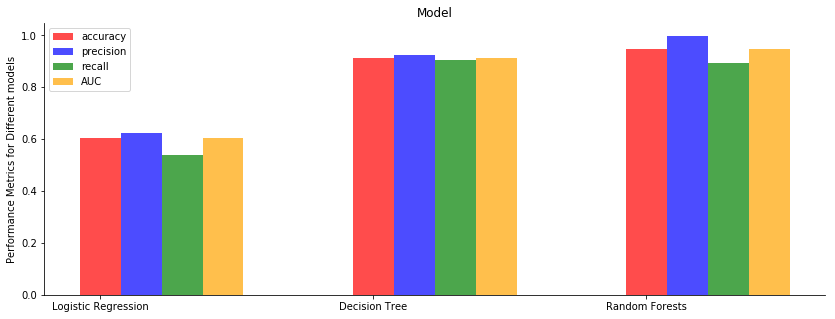

In [109]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression','Decision Tree','Random Forests' ]
values = [accuracy_logreg, accuracy_dte, accuracy_forreste]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests ']
values = [precision_logreg, precision_dte, precision_forreste]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree ', 'Random Forests ' ]
values = [recall_logreg,recall_dte,  recall_forreste]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests' ]
values = [auc_logreg, auc_dte, auc_forreste]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()